# Part I - Ford GoBike System Data Exploration
## by Akubazgi Gebremariam
## Introduction
> The Ford GoBike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

%matplotlib inline
# ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

## Importing custom modules

In [3]:
# importing 
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

### Loading the dataset

In [37]:
# loading the data
df_bikeData = pd.read_csv('../Data/201902-fordgobike-tripdata.csv')

In [38]:
# using head
df_bikeData.head()     

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [39]:
# initialize info object
bikeInfo = DataInfo(df_bikeData)

In [41]:
# Dataset information
bikeInfo.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [42]:
# shape of the dataset
bikeInfo.shape_df()

Dataframe contains 183412 rows and 16 columns


In [13]:
# percentage of null in the dataset
bikeInfo.null_percentage()

Dataframe contains null values of 0.59% out of the given dataset


In [43]:
# checking null
bikeInfo.get_count_null()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [44]:
# Stastical describtion for the numerical varibles
bikeInfo.describe_stat().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


## Data cleaning 
The dataset needs handling the following quality issues
- null values issues 
- Datatype issues 

In [45]:
# dropping null values
df_bikeData.dropna(inplace = True)

In [49]:
# checking after droping null
bikeInfo = DataInfo(df_bikeData)
bikeInfo.get_count_null()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


In [50]:
# Convert time variables from object to datetime
df_bikeData['start_time'] = pd.to_datetime(df_bikeData['start_time'])
df_bikeData['end_time'] = pd.to_datetime(df_bikeData['end_time'])

## What is the structure of your dataset?
> The dataset contains 183412 rows observations with 16 columns(varibales)

### What is/are the main feature(s) of interest in your dataset?
the main interest of the features in the dataset are given below 
> duration_sec, start_time, start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trip
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I expect that user_type, start_time, duration_sec and member_gender will help me to identify the analysis on the given datasets.

In [ ]:
# copy the data
df_cleaData=df_bikeData.copy()

## Univariate Exploration
In this section, the behavior and distribution of each variables are explored using different plots.

### 1. what is the distribution of duration usage in the given dataset?
- To answer this quiestion histogram plot is applied 

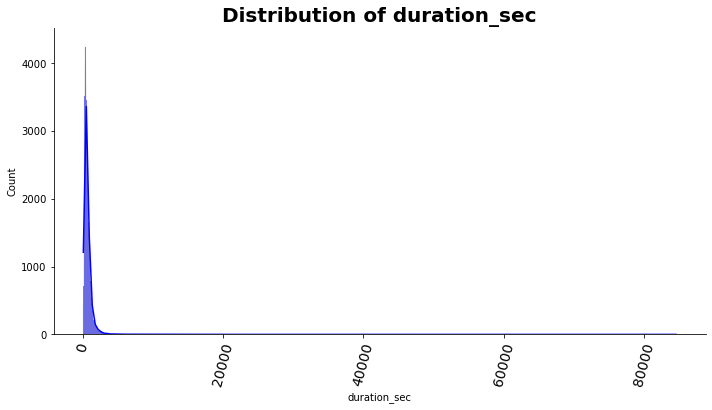

In [8]:
# calling the hist function
VisualiseDf.plot_hist(df_cleaData,'duration_sec','blue')

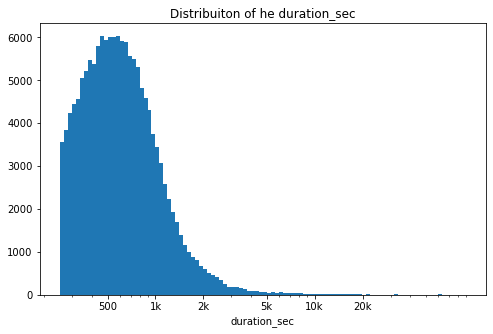

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_cleaData['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_cleaData, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec')
plt.title("Distribuiton of the duration_sec")
plt.show()

> The the distribution of the duration is skewed to wards right that shows the duration from the start station to end station takes few seconds. Most of the rids took 500 seconds to reach its destination.
> So in most case, the distance between the start and end station is short.

In [23]:
# lets group made group by station name
#df_bike_station = df_bike.groupby('start_station_name')

### 2.What kind of users are using the bike service most?
- To answer this quiestion, countplot is applied

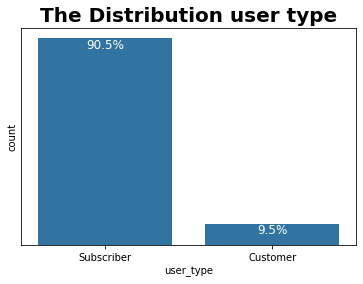

In [51]:
# calling the plot function 
plt.title(f'The Distribution user type', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_cleaData, df_cleaData['user_type'])

> As we can see the distribution from the above, majority (90.5%) of the user type are subscribers. Thus, most of the user types are permanent users who agrees to receive emails or notifications to use the bike ford company.
> Customer counts to 9.5% of the total datasets

### 3. What is distribution of gender in the given dataset?

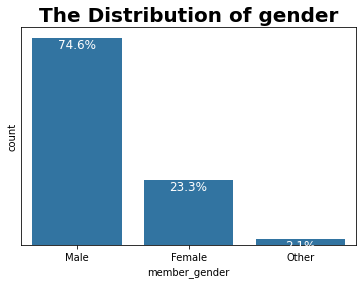

In [12]:
# claling the function 
plt.title(f'The Distribution of gender', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_cleaData,df_cleaData['member_gender'] )

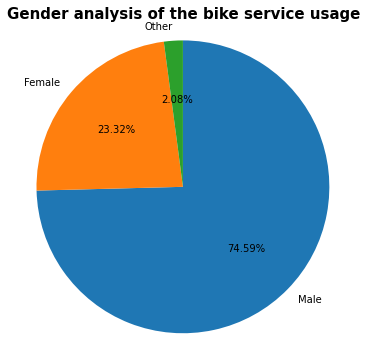

In [13]:
# using pie plot
def pie_plot(column:pd.DataFrame, title):
        plt.figure(figsize=(10,6))
        sorted_counts = column.value_counts()
        plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
                counterclock = False, autopct='%1.2f%%');
        plt.axis('square')
        #plt.legend('user_type')
        plt.title(title, fontsize=15, fontweight ='bold');

pie_plot(df_cleaData['member_gender'],'Gender analysis of the bike service usage')

> As the above distribution shows, Males are the most users of 201902-fordgobike-tripdata.
> - 74.6% are Men
> - 23.3% are Feamle
> - 2.08% are Other

### 4. Is the bikes are sharable to all kind of trip? how far?

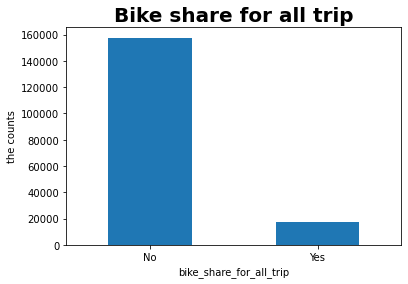

In [16]:
# Bar plot for bike_share_for_all_trip
df_cleaData['bike_share_for_all_trip'].value_counts().plot(kind = 'bar');
plt.xticks(rotation=0) 
plt.title("Bike share for all trip", size=20, fontweight='bold')
plt.xlabel("bike_share_for_all_trip")
plt.ylabel("the counts")
plt.show()

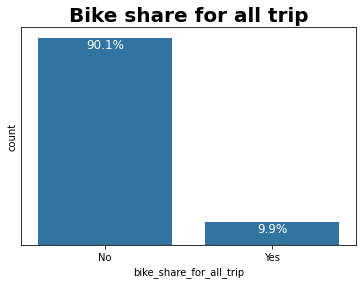

In [17]:
# or we can use this option
plt.title("Bike share for all trip", size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_cleaData, df_cleaData['bike_share_for_all_trip'])

> The above plot shows the following facts
> - Only 9.9% of the total data can be used for all kind of trips. 
> - This indicates, the ford bike company has specifc and separate bikes for specific kind of trip services.

### 5. Which stations are in use by the ford bike ride mostly?
- The value counts method will be use to identify some of the most used stations 

In [18]:
# bar plot catagorical variables start_station_name  and end_station_nameof top 8 places
df_cleaData['start_station_name'].value_counts().head(8)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Name: start_station_name, dtype: int64

In [19]:
df_cleaData['end_station_name'].value_counts().head(8)           

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Name: end_station_name, dtype: int64

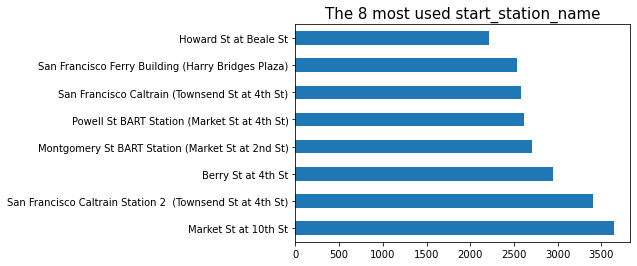

In [20]:
# using bar chart for the start station name
plt.title(f'The 8 most used start_station_name', fontsize=15)
df_cleaData.start_station_name.value_counts(ascending = False).head(8).plot(kind ='barh');

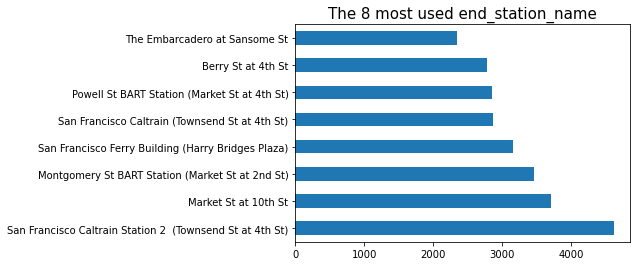

In [23]:
# Using bar chart for the end station name
plt.title(f'The 8 most used end_station_name', fontsize=15)
df_cleaData.end_station_name.value_counts(ascending = False).head(8).plot(kind ='barh');

> From the above plots, 2 graph shows the most widely used start and end station name
> - Market St at 10th St is the most widely used start station name
> - San Francisco Caltrain Station 2 (Townsend St at 4th St) is the most widely used end start station name
> - So, it can be easily understood which stations are mostly in use by the Ford GoBike company 

### 6. Which stations are in use by the ford bike ride least?
- Value_counts and barh will be used to visualize

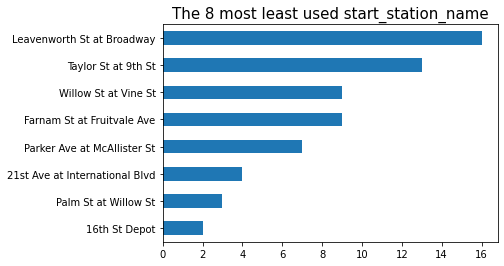

In [27]:
# 8 least start station name 
plt.title(f'The 8 most least used start_station_name', fontsize=15)
df_cleaData.start_station_name.value_counts(ascending = True).head(8).plot(kind ='barh');

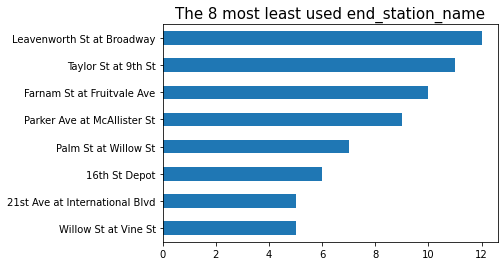

In [32]:
# least 8 end station name used for bike service
plt.title(f'The 8 most least used end_station_name', fontsize=15)
df_cleaData.end_station_name.value_counts(ascending = True).head(8).plot(kind ='barh');

> From the above plots, 2 graph shows the start and end station name which is least used
>- 16th St Depot is least used start station name
>- Willow St at vine St is least used end station name 
>- The graph also shows some bikes are only assigned to give services from specific start station to end station such as `Leavenworth St at Broadway`

### 7. How does look like the distribution of birth year in the bike service usage?

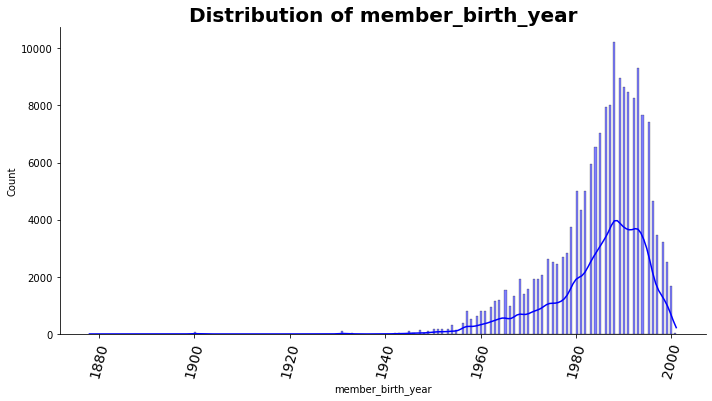

In [41]:
# lets look the distribution of birth_year
VisualiseDf.plot_hist(df_cleaData, 'member_birth_year', color ="blue")

,member_birth_year
user_type,
Customer,32889331.0
Subscriber,314355947.0


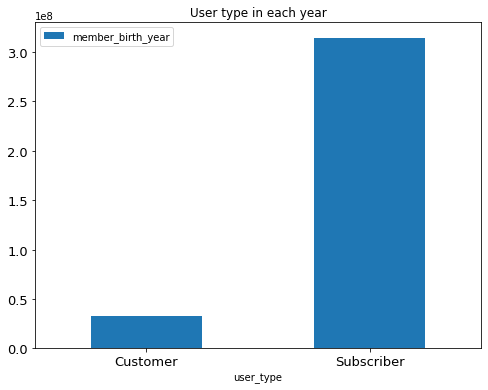

In [55]:
# in terms of user type in each birth year
user_birth = df_cleaData[['member_birth_year', 'user_type']].groupby(df_cleaData['user_type']).sum()
#user_birth
ax = user_birth.plot(kind='bar', figsize=(8,6), fontsize=13, rot=0);
plt.title("User type in each year")
locs, labels = plt.xticks()
user_birth

> Most of the users who are born in between 1980 and 2000 are users of the ford bike service 
- In terms of user type in the birth year
>- Around 314355947.0 are Subscriber 
>- Arround 32889331.0 are Customers to the company.

### Datetime analysis
- In this analysis, first feature engineering or adding new columns would be done.
- the start_time would help us to investiget the bike service usage in terms of days, dates, hourly and months. So feature is helpfull to perform these insights.

In [101]:
# feature engineering 
# adding month
df_cleaData['month'] = df_cleaData['start_time'].dt.month_name()
# adding start day
df_cleaData['start_day'] = df_cleaData['start_time'].dt.day_name()
# adding hour
df_cleaData['hour'] = df_cleaData['start_time'].dt.hour
# adding date
df_cleaData['date'] = df_cleaData['start_time'].dt.date

In [56]:
# view the newly added columns
df_cleaData.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'month', 'start_day', 'hour', 'date'],
      dtype='object')

### 8. Waht is the daily bike usage services in the Ford GoBike ride company?

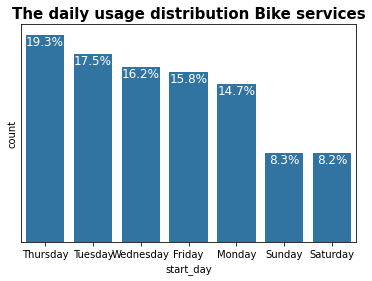

In [57]:
# daily distribution analysis
plt.title("The daily usage distribution Bike services", size=15, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_cleaData, df_cleaData['start_day'])

### 9. Waht is the Hourly distribution of bike usage service on the days?

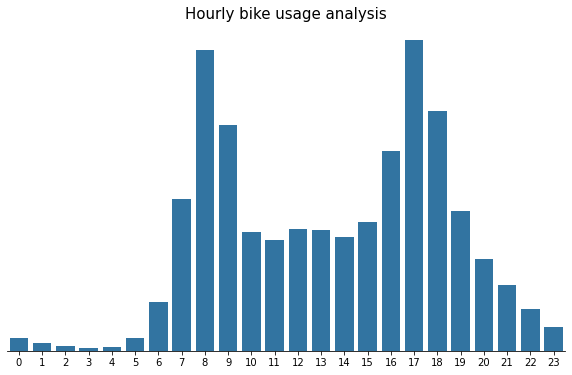

In [50]:
# hourly bike service usage analysis
def hourUsage_bar():
    hour_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(10,6))
    plt.title('Hourly bike usage analysis', fontsize=15)
    ax = sb.countplot(data=df_cleaData, x='hour', order=hour_order, color=base_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.yticks([])
    plt.ylabel('')
    plt.xlabel('');
hourUsage_bar()

> As we can see from the above plot, 
>- The most used hour is 17 (5 pm) and the second most hour is 8(2:00 AM).
>- These hours are time for moving to home from works places or offices and entering to work places respectively. 
> - This plot also indicates, which time are busey and idel to prevent from unneccessary wastage of time.

### 10. What are the Most and least work dates?

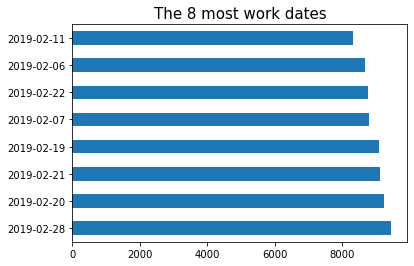

In [71]:

# Here 8 working dates are sampled to answer the question 
plt.title(f'The 8 most work dates', fontsize=15)
df_cleaData.date.value_counts(ascending = False).head(8).plot(kind ='barh');

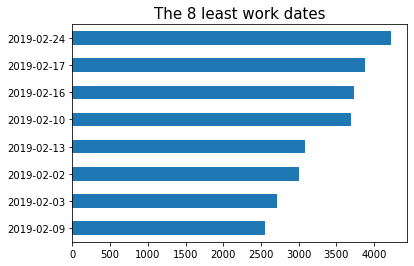

In [72]:
plt.title(f'The 8 least work dates', fontsize=15)
df_cleaData.date.value_counts(ascending = True).head(8).plot(kind ='barh');

> from the above plots we can understand that, the bike service usage increase from the mid month to wards the end of the month.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was some issues associated with the dataset of Ford GoBike.
>- data type issue
>- null value issue whuch are associated with quality
>- Accordingly the issue has been handled 
 
> feature engineering has been also performed to conduct an investigation on the time based dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As mentined in the above, feature or column has been engineered from the start_time column to perform an investigation on the usage of bike service on each days, hour, dates and month. So, opertions to make it more tidy has been applied. The datatypes of the datetime varibles is also changed to their correct datatypes.

## Bivariate Exploration

> In this section, investigation the relationships between pairs of variables in the data is conducted.

In [6]:
#  classification into numerical and catogorical
df_bik_numeric =df_cleaData[['duration_sec', 'member_birth_year','hour']]
df_bik_cat =df_cleaData[['start_station_name', 'end_station_name', 'user_type','member_gender', 'bike_share_for_all_trip']]

### 11. what is the correlation selected numarical variables and catagorical variables

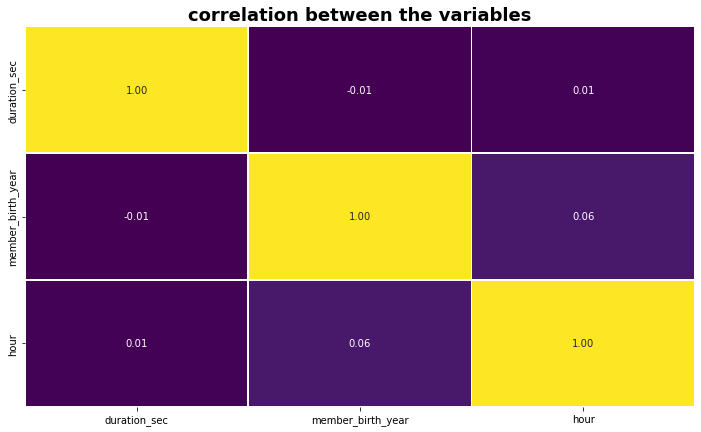

In [75]:
# correlation between the numerical varibales 
corelation = df_bik_numeric.corr()
VisualiseDf.plot_heatmap(corelation, "correlation between the variables")

> As it is observed from the above heatmap,  the variables are having less relationship among them. some of them are showing negative correlation (birth year and duration)which means when the variable increase or decrease the other varible goes to the opposit direction as we abserved from the univiraite. some of them are showing posotive relationship between them.

### 12. What does User type tells us on each day in the given dataset?
Seaborn countplot ploting method is used to compute the nuber of user types per day

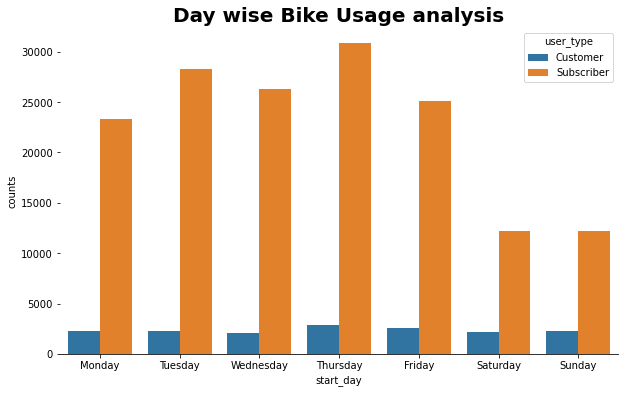

In [13]:
# code using countplot 
def bar_plot(df, column,orders,heu1,title):
        plt.figure(figsize=(10,6))
        plt.title(title, size=20, fontweight='bold')
        chart = sb.countplot(data=df, x=column, order=orders, hue=heu1)

        chart.set(xlabel=column, ylabel='counts')
        sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
        plt.gca().legend().set_title(heu1);

days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
bar_plot(df_cleaData, 'start_day', days, 'user_type','Day wise Bike Usage analysis')

> As we can see, almost the user types are subscribers and Thursday is the day in which both user type are widely using bike services.

### 13. What does User type tells us on each hour in the given dataset?
Seaborn countplot ploting method is used to compute the nuber of user types per hour

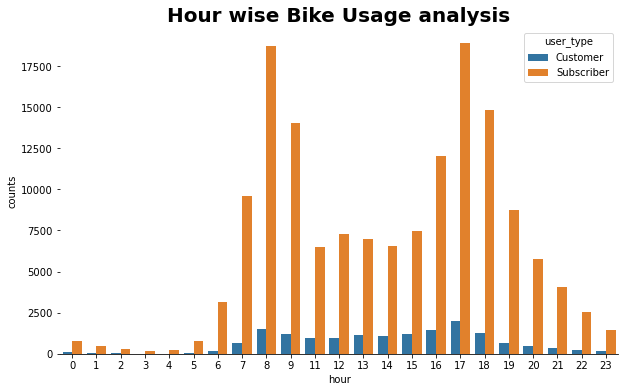

In [14]:
# calling bar_plot(12)
order = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23]
bar_plot(df_cleaData, 'hour', order, 'user_type','Hour wise Bike Usage analysis')

> The following observation can be drawn from the above plot
>- The bike service usage at rush time(entring and leaving to and from work places) are mostly used by subscriber. 
>- Similarly customer are also mostly using that time (rush time) comparing to other time slot.

### 14. What is the duration usage on each hour in the given dataset?
Seaborn scatterplot ploting method is used to compute their relationship

In [9]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
        plt.figure(figsize=(12, 7))
        sb.scatterplot(data = df, x=x_col, y=y_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks( fontsize=14)
        plt.show()

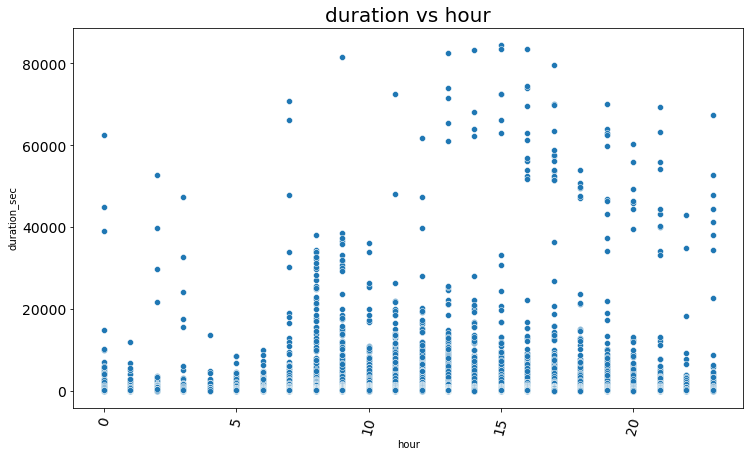

In [10]:
#plot_scatter(df_cleaData, )
plot_scatter(df_cleaData, 'hour','duration_sec', 'duration vs hour')

>The Two varibles are not having strong relationship, but it could tells us the following insight.
>- The maximum duration usage by most bike service upto lunch time seems taking arround 4k seconds.
>- Peole who use the bike service arround night took much duration

### 15. What does look like the numerical and catagorical varibles relationship?
Some of the catagorical I mostly intersted are included here. boxplot is applied to show the relationship between them.

<Figure size 1440x720 with 0 Axes>

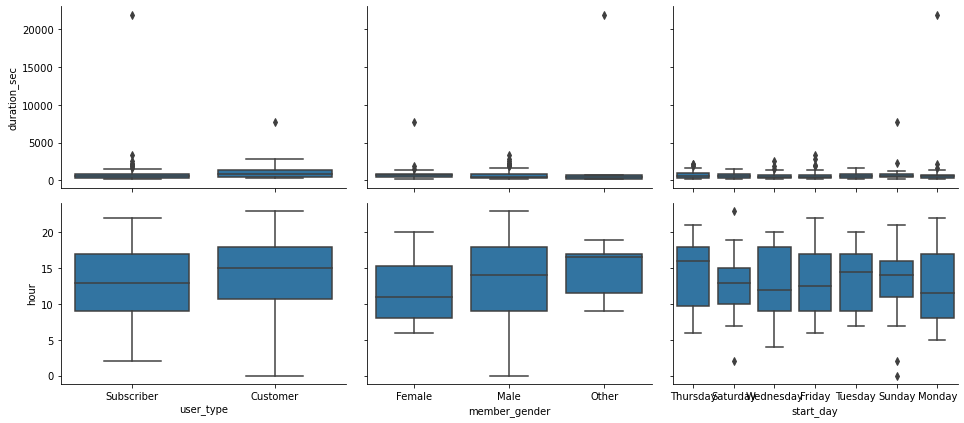

In [17]:
df_cat =df_cleaData[['user_type','member_gender', 'start_day']]

df_bike_sample1 = df_cleaData.sample(n=300, replace = False)
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = df_bike_sample1, y_vars = ['duration_sec','hour'], x_vars = df_cat,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

The above box plot shows some outliers and skewnesses (left or right), in which most of the values are either lying below or above the median. 
- It can be said that, the duration usage by all catagorical vairbles seems use below 5k seconds with some exceptions which are shown as outliers laying above the maximum value.
- The male from the member gender is skeweed to wards left with regard to the hour and females are laying on the right.
- Most of he customers user type are laying on the left box which means below median value. it indicates they use the mornning time while they are using the bike service.
- The subscriber user type seems interesting insight in which shows no skewnesses with regard to each hour. 
- Thursday, the most busy bike usage day with regard to hour and most of user uses morning time up to the peak hour(17).

### 16. What is the relationship between the catagorical varibles?
Some of the catagorical I mostly intersted are included here. countplot is applied to show the relationship between them.

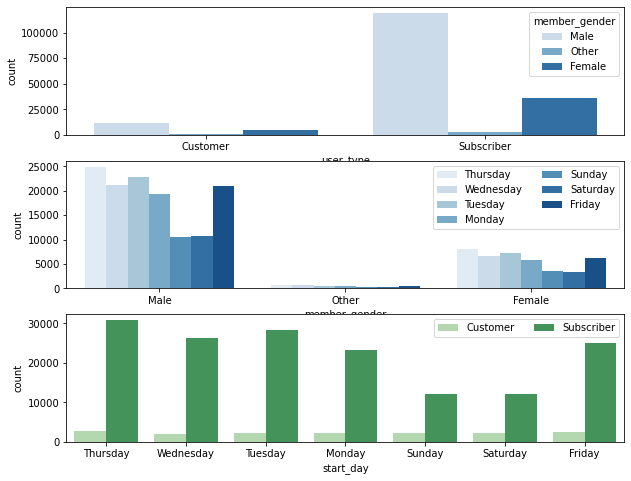

In [34]:
# figuer size
plt.figure(figsize = [10, 8])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = df_cleaData, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: member_gender vs start_day
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_cleaData, x = 'member_gender', hue = 'start_day', palette = 'Blues')
ax.legend(ncol = 2) 

# subplot 3: start_day vs user_type
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_cleaData, x = 'start_day', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# # subplot 4: start_day vs user_type
# ax = plt.subplot(4, 1, 3)
# sb.countplot(data = df_cleaData, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens')
# ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> Some interesting observation from the above plot
>- Most of the subscribers are male
>- Most males use bike service on Thursday and Tuesday
>- Most females use bike service on same day as males
>- Thursday is the day mostly used for bike usage by the Subscribers(third plot).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It can be said that, the duration usage by all catagorical vairbles seems use below 5k seconds with some exceptions which are shown as outliers laying above the maximum value.
> Most of the customers user use the mornning time while they are using the bike service.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most females use bike service Thursday and Tuesday and Thursday is the day mostly used for bike usage by the Subscribers.

## Multivariate Exploration
> In this section, plot with three or more variables will be created.

### 17. What is the relationship among the day and duartion usage in relation to user type?
So in this plot three varible are involved.

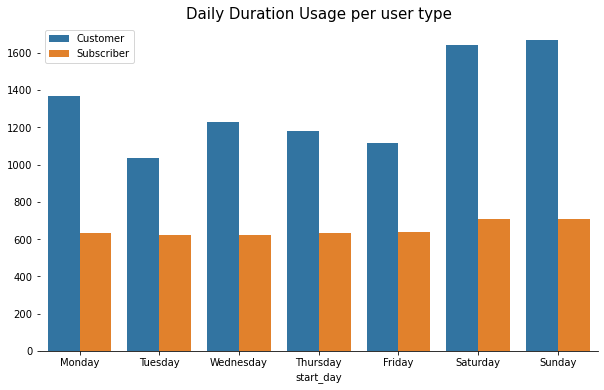

In [36]:
def plot_multivariate():
    # daily duration usage based on user type
    plt.figure(figsize=(10,6))
    plt.title('Daily Duration Usage per user type', fontsize=15)
    chart = sb.barplot(data=df_cleaData, x='start_day', y='duration_sec', order=days, hue='user_type', ci=None)

    chart.set(xlabel='start_day', ylabel='')
    # Remove legend title
    sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
    plt.gca().legend().set_title('');

plot_multivariate()


> Some interesting observation here
> - Duration usage on weekends is higher comparing to weekdays
> - Duration usage by Customers is higher than Subscribers
> - Sunday is the day which users take more duration in the bike usage. This could be, people may move far from home to spend time at the break day.

### 18. What is the relationship among the day and duartion usage in relation to user type in different classes?
So in this plot three varible are involved.

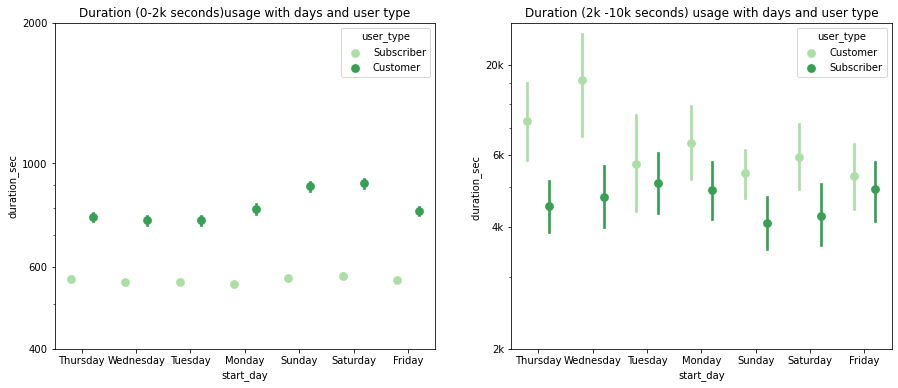

In [49]:
# Creating classes greater and below then 2k second
df_du= (df_cleaData['duration_sec'] <= 2000) 
df_cleaData_du = df_cleaData.loc[df_du,:]

df_du1 = (df_cleaData['duration_sec'] >2000)
df_cleanDta_du1 = df_cleaData.loc[df_du1,:]

fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
# plot the first class
sb.pointplot(data = df_cleaData_du, x = 'start_day', y = 'duration_sec', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('Duration (0-2k seconds)usage with days and user type')
ax[0].set_ylabel('duration_sec')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000, 2000])
ax[0].set_yticklabels(['400', '600', '1000', '2000'])
ax[0].set_yticklabels([],minor = True)
# ploting the second class
sb.pointplot(data = df_cleanDta_du1, x = 'start_day', y = 'duration_sec', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('Duration (2k -10k seconds) usage with days and user type')
ax[1].set_ylabel('duration_sec ')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '20k'])
ax[1].set_yticklabels([],minor = True)
plt.show();

> From the above two class of plots, the observations are
> - In both classes of plot Customers tend to use much duration than Subscribers in each day.
> - Even there are some customers who use more duration on Wednesday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Some of observations are:
>- Customers tends to use more duration usage than Subscribers in each days
>- Subscribers use bike service usage high at the rush hour(8,17), Customers use flexible time time.
>- Subscribers use bike service more in weekdays comparing to weekends.
>- Customers use more duration in weekends than weekdays
### Were there any interesting or surprising interactions between features?
> The surprising thing is, Thursday is the most crowded day in the bike service usage analysis by both Customers and Subscribers in the weekdays.

## Conclusions
> In this Data Exploration part, data cleaning and feature engineering for better investigation about the dataset has been conducted. The distribution and nature of the most interested variables is explored using different ploting methods. The bivariate and multivariate exploration are also conducted to observe the relationship among the variables and find insights that would help us to draw conclusion about the bike usage service analysis. Finally, observations has been tried to put on each question visualization section.